In [4]:
import seaborn as sns
import pandas as pd
import mdtraj as md
import os
from numba import jit
import numpy as np
import scipy.signal
import re

#Matplotlib
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as mpatches




In [18]:
COMPARE_NAMD_GMX = False

if COMPARE_NAMD_GMX:
    systems = ["apoe1","apoe3"]
    outputfolder = "comparative_analysis_GMX_NAMD"
    palette=["#0900ff","#ff0000","#8e8aff","#ffa6a6"]
else:
    systems = ["apoe1","apoe2","apoe3","apoe4", "nmr"]
    outputfolder = "comparative_analysis"
    palette=None



replica = 1
workdir = "D:/work/ApoE/simulation/apoe/"
#workdir = "/Users/thibault/Documents/WORK/simu/apoe/"
outputPNGdir = f"{workdir}/{outputfolder}/PNG"
outputCSVdir = f"{workdir}/{outputfolder}/CSV"
if not os.path.exists(outputPNGdir):
    os.makedirs(outputPNGdir)
if not os.path.exists(outputCSVdir):
    os.makedirs(outputCSVdir)

os.chdir(workdir)

In [19]:
def save_fig(figname,outputdir,format="png",dpi=300,bbox_inches='tight', transparent=False):
    from pathlib import Path
    Path(f"{outputdir}").mkdir(parents=True, exist_ok=True)

    plt.savefig(f"{outputdir}/{figname}.{format}", dpi=dpi, bbox_inches=bbox_inches, transparent=transparent)

In [20]:

def compare_analysis(analysisname, xaxis, yaxis, xlabel=None, ylabel=None, linewidth=1, vlines=[], add_namd=True, palette=None):
    dataframelist = []
    fig = plt.figure(figsize=(10,5))

    if analysisname[-4:] != ".csv":
        analysisname += ".csv"

    
    for system in systems:
        file = f"{workdir}/{system}/results/replica_{replica}/prod/analysis/CSV/{analysisname}"
        df = pd.read_csv(file, sep=";")
        df["system"]=system
        if add_namd:
            df = df[::2]
        dataframelist.append(df)


    if add_namd:
        namds=['apoe1','apoe3']
        for system in namds:
            file = f"{workdir}/namd-reza/{system}/analysis/CSV/{analysisname}"
            df = pd.read_csv(file, sep=";")
            df["system"]=f"{system}-namd"
            dataframelist.append(df)
        


    df_allsystems = pd.concat(dataframelist)
    df_allsystems = df_allsystems.reset_index(drop=True)

    if palette:
        graph = sns.lineplot(x=xaxis,y=yaxis,hue="system",data=df_allsystems, linewidth=linewidth, palette=palette)
    else:
        graph = sns.lineplot(x=xaxis,y=yaxis,hue="system",data=df_allsystems, linewidth=linewidth)
    if ylabel==None:
        ylabel = yaxis
    if xaxis == None:
        xlabel = xaxis

    for x in vlines:
        plt.axvline(x=x, color='grey', linewidth=1, linestyle="dotted")

    graph.set(ylabel=ylabel, 
              xlabel=xlabel,
              title=f"Comparative analysis - {analysisname[:-4]}",
              )
    save_fig(analysisname[:-4], outputPNGdir)
    df_allsystems.to_csv(f"{outputCSVdir}/{analysisname}",sep=";", index=False)



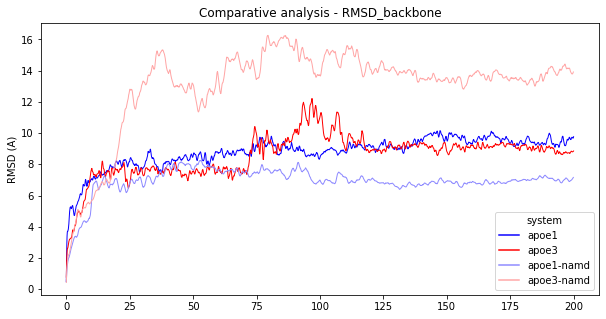

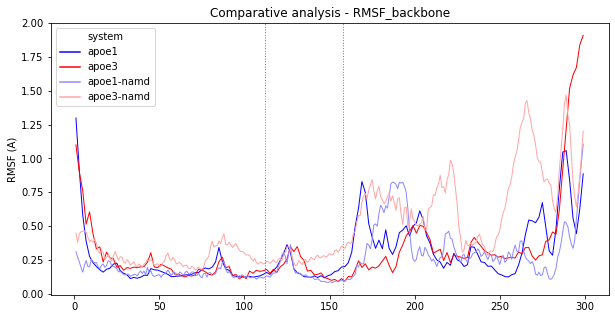

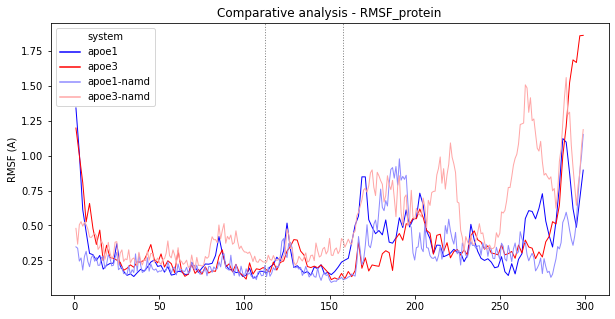

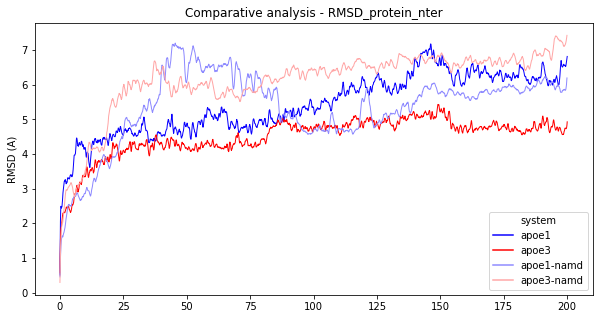

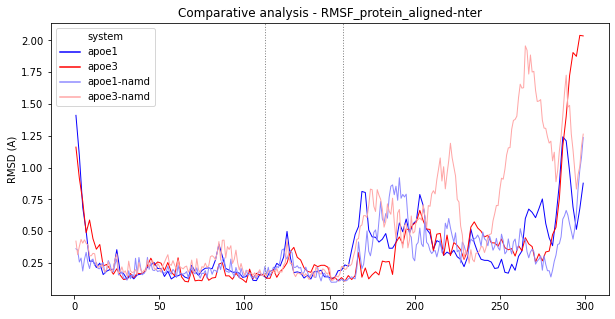

In [22]:

compare_analysis("RMSD_backbone", xaxis="Time (ns)",yaxis="Average", ylabel="RMSD (A)", palette=palette, add_namd=COMPARE_NAMD_GMX)
compare_analysis("RMSF_backbone", xaxis="Residue",yaxis="RMSF (A)", ylabel="RMSF (A)", vlines=[112,158],palette=palette, add_namd=COMPARE_NAMD_GMX)
compare_analysis("RMSF_protein", xaxis="Residue",yaxis="RMSF (A)", ylabel="RMSF (A)", vlines=[112,158],palette=palette, add_namd=COMPARE_NAMD_GMX)
compare_analysis("RMSD_protein_nter", xaxis="Time (ns)",yaxis="Average", ylabel="RMSD (A)",palette=palette, add_namd=COMPARE_NAMD_GMX)
compare_analysis("RMSF_protein_aligned-nter", xaxis="Residue",yaxis="RMSF (A)", ylabel="RMSD (A)", vlines=[112,158], palette=palette, add_namd=COMPARE_NAMD_GMX)


